## Seasonal Statistics

Let's compute some statistics for our datasets.  We can display the mean, mean +- 1std, median, maximum, minimum. Let's begin by loading the data.

In [1]:
import xarray as xarr

dataFile = "./data/clipped_monthly_pressure_1988.nc"
data = xarr.open_dataset(dataFile)

# convert kelvin to celsius
data["t_celsius"] = data["t"] - 273.15

Per their [documentation](https://xarray.dev/blog/season-grouping), xarray supports grouping and selecting by season. Thus, let's begin by adding a seasonal coordinate to our data, and then calculating the statistics by grouping by season. To ensure we're working in compatible dimensions, we need to make sure to collapse the other dimensions to ensure we're not calculating the mean across every latitude and longitude.

In [2]:
seasonal_data = data.assign_coords(season=data["valid_time"].dt.season) # attach seasons to data

# returns data array with four objects
seasonal_means = seasonal_data["t_celsius"].groupby("season").mean(...) 
seasonal_stds = seasonal_data["t_celsius"].groupby("season").std(...)
seasonal_mins = seasonal_data["t_celsius"].groupby("season").min(...)
seasonal_maxs = seasonal_data["t_celsius"].groupby("season").max(...)
seasonal_medians = seasonal_data["t_celsius"].groupby("season").median(...)

Now, we can proceed to formatting a table to display our data. Let's first begin by defining the seasonal labels and building our data as a 2d list according to instructions in the [pyplot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.table.html).

In [3]:
# create our labels  
seasons = ["DJF", "MAM", "JJA", "SON"] # xarray season labels
season_labels = ["Winter", "Spring", "Summer", "Fall"]

# Build the table data as a 2D list
table_data = []
for i, season in enumerate(seasons):
    row = [
        season_labels[i],
        f"{seasonal_means.sel(season=season).values:.2f}",
        f"{seasonal_medians.sel(season=season).values:.2f}",
        f"{seasonal_stds.sel(season=season).values:.2f}",
        f"{seasonal_mins.sel(season=season).values:.2f}",
        f"{seasonal_maxs.sel(season=season).values:.2f}"
    ]
    table_data.append(row)


Now, we can construct and show our figure.

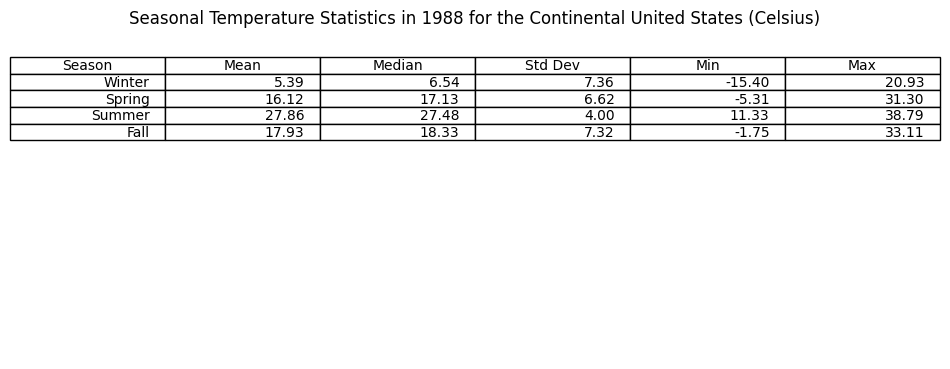

In [4]:
import matplotlib.pyplot as plot

figure = plot.subplots(figsize=(12, 4)) # new figure

table = plot.table(cellText=table_data, colLabels=["Season", "Mean", "Median", "Std Dev", "Min", "Max"], loc="upper center")

plot.title("Seasonal Temperature Statistics in 1988 for the Continental United States (Celsius)", pad=20)
plot.axis("off")
plot.savefig("./plots/Seasonal_Temperature_Statistics_1988.png")
plot.show()

Now, let's do the same for cloud liquid water content.

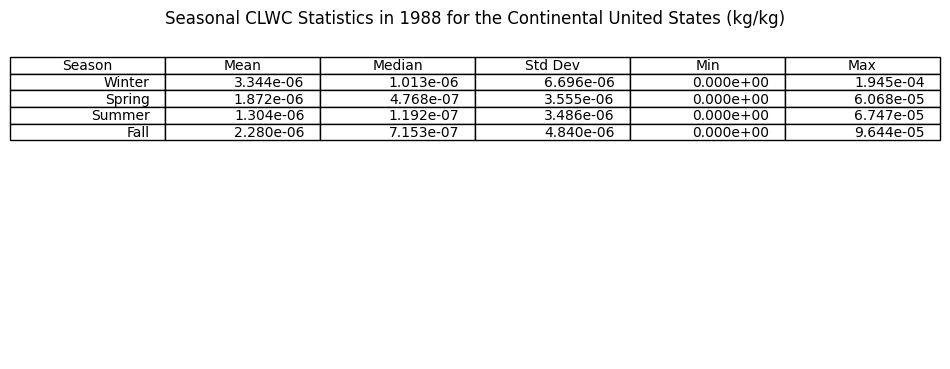

In [5]:
seasonal_data = data.assign_coords(season=data["valid_time"].dt.season) # attach seasons to data

# returns data array with four objects
seasonal_means = seasonal_data["clwc"].groupby("season").mean(...) 
seasonal_stds = seasonal_data["clwc"].groupby("season").std(...)
seasonal_mins = seasonal_data["clwc"].groupby("season").min(...)
seasonal_maxs = seasonal_data["clwc"].groupby("season").max(...)
seasonal_medians = seasonal_data["clwc"].groupby("season").median(...)


# build the table data as a 2D list
table_data = []
for i, season in enumerate(seasons):
    row = [
        season_labels[i],
        f"{seasonal_means.sel(season=season).values:.3e}",
        f"{seasonal_medians.sel(season=season).values:.3e}",
        f"{seasonal_stds.sel(season=season).values:.3e}",
        f"{seasonal_mins.sel(season=season).values:.3e}",
        f"{seasonal_maxs.sel(season=season).values:.3e}"
    ]
    table_data.append(row)

figure = plot.subplots(figsize=(12, 4)) # new figure

table = plot.table(cellText=table_data, colLabels=["Season", "Mean", "Median", "Std Dev", "Min", "Max"], loc="upper center")

plot.title("Seasonal CLWC Statistics in 1988 for the Continental United States (kg/kg)", pad=20)
plot.axis("off")
plot.savefig("./plots/Seasonal_CLWC_Statistics_1988.png")
plot.show()